loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


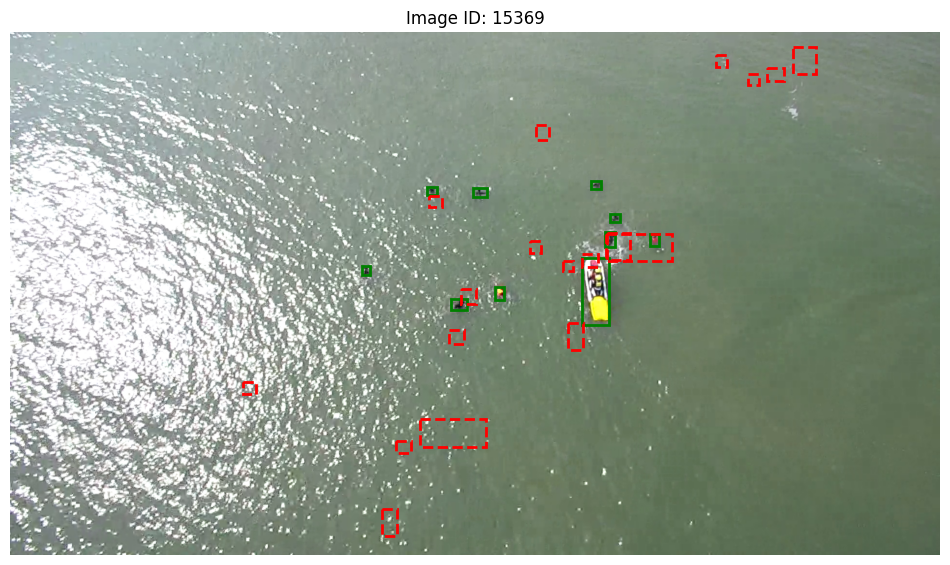

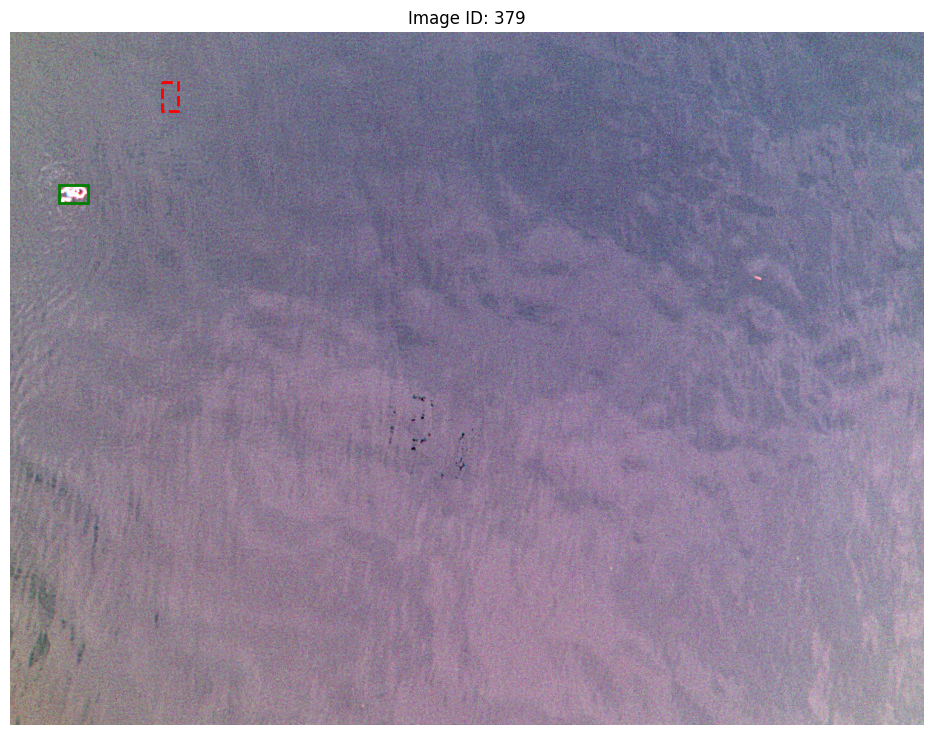

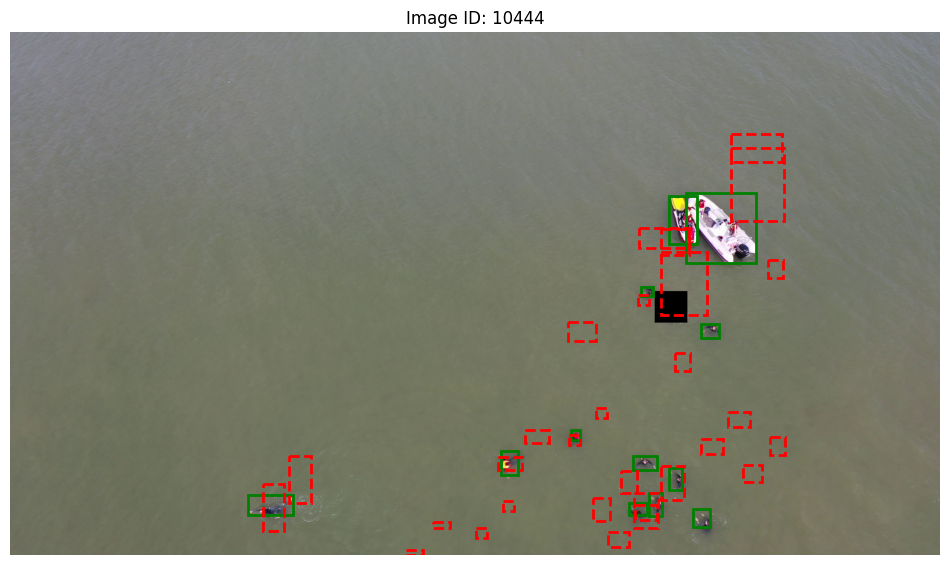

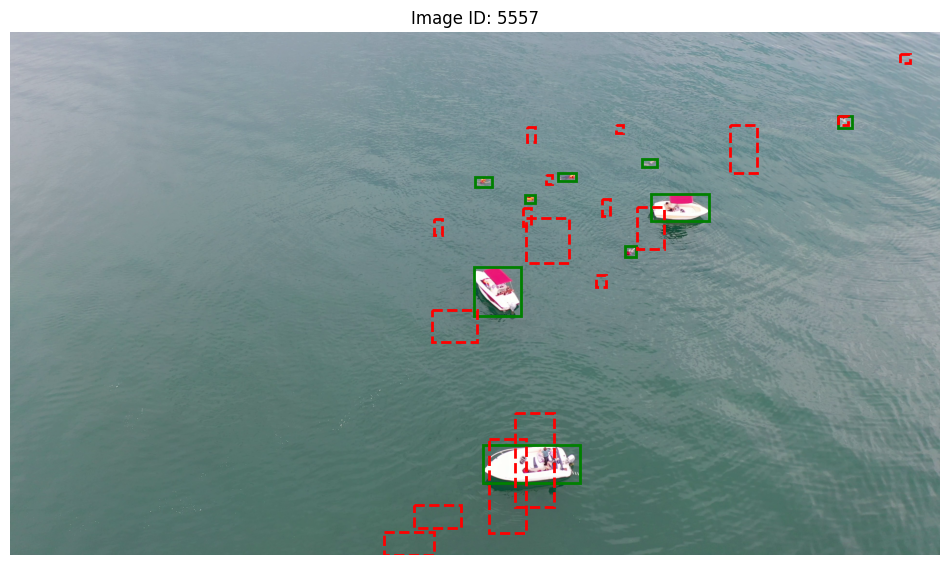

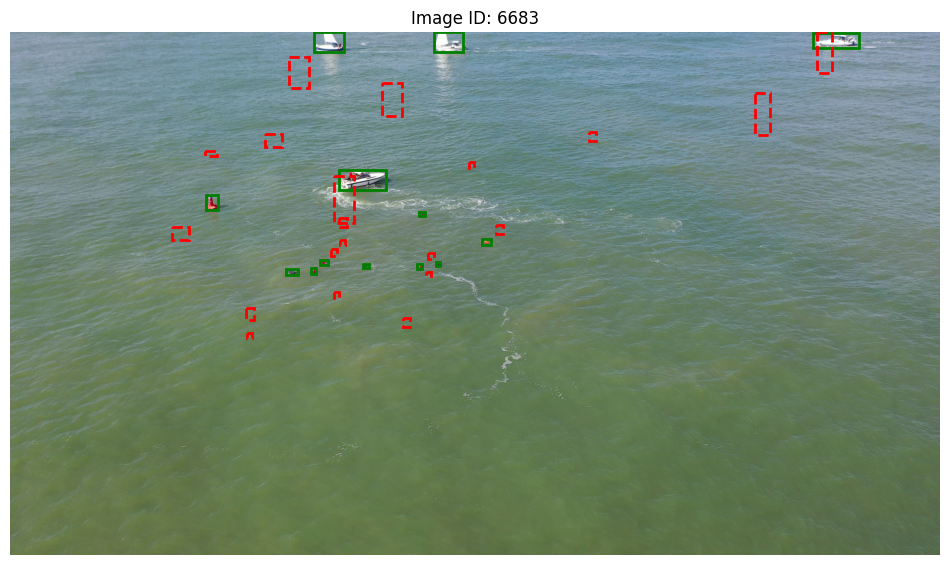

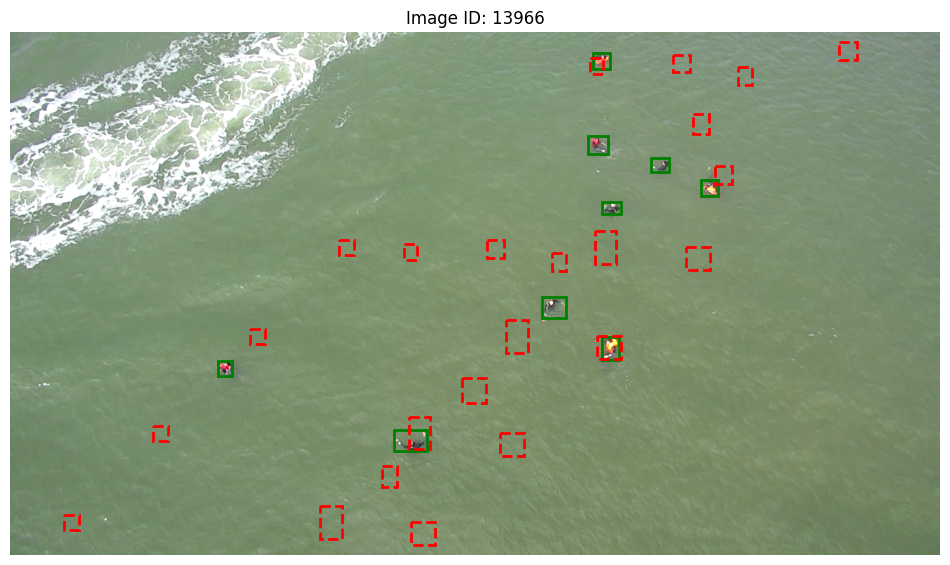

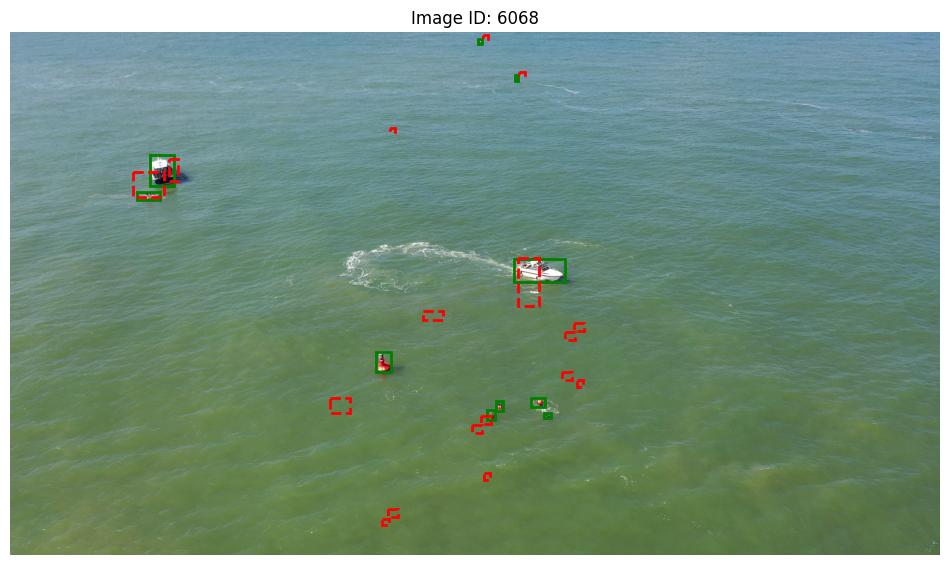

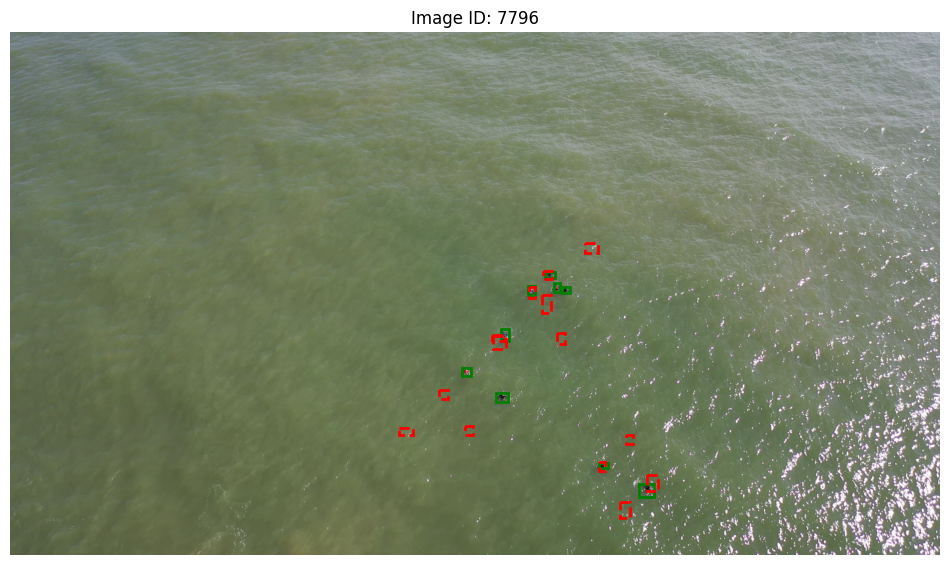

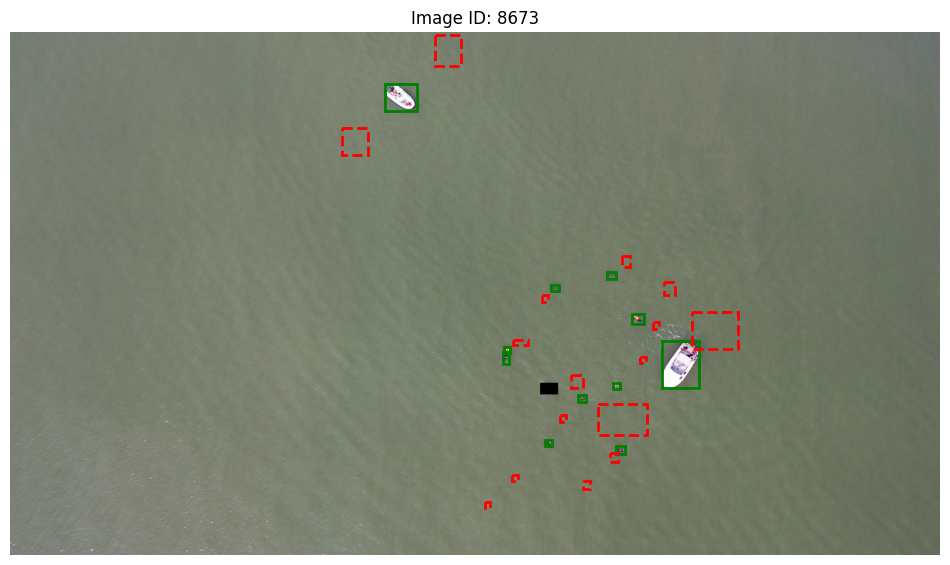

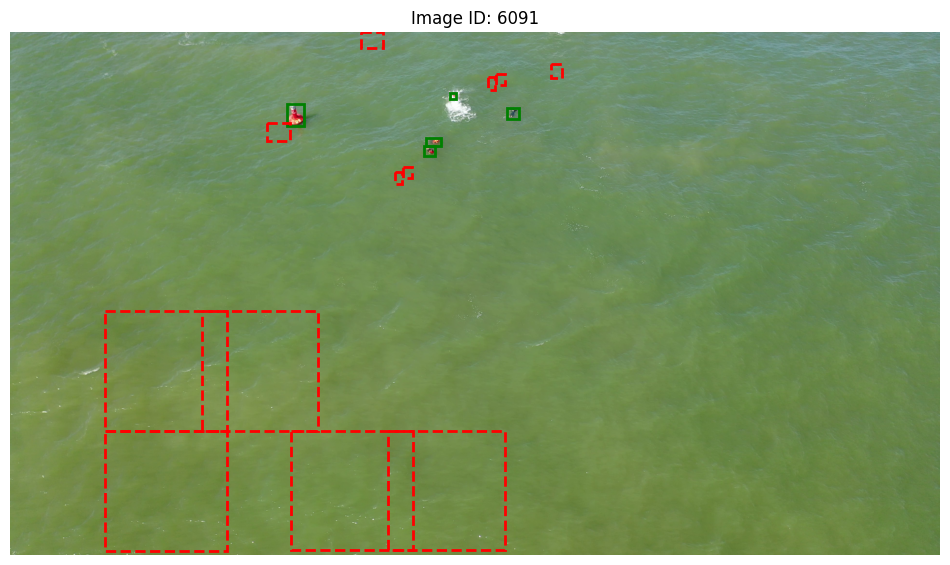

In [9]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO

# Paths to the ground truth and predictions files
groundtruth_file = '/scratch1/rsawahn/data/sds/coco/annotations/instances_val.json'
predictions_file = '/scratch1/rsawahn/data/results_coco/slicedTrain_fullEval/efficientdet_sds-sliced-new_new_fullImgEval/sahi_sf_overlap_full.json'
images_folder = '/scratch1/rsawahn/data/sds/coco/val'

# Load the COCO files
with open(groundtruth_file, 'r') as f:
    coco_gt = json.load(f)

with open(predictions_file, 'r') as f:
    coco_pred = json.load(f)

# Initialize COCO ground truth object
coco_gt_obj = COCO(groundtruth_file)

# Function to visualize an image with annotations
def visualize_image(image_id):
    # Get image info
    image_info = coco_gt_obj.loadImgs(image_id)[0]
    image_path = os.path.join(images_folder, image_info['file_name'])
    
    # Load image
    image = Image.open(image_path)
    
    # Create a figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image)
    
    # Get ground truth annotations
    ann_ids = coco_gt_obj.getAnnIds(imgIds=image_info['id'])
    anns = coco_gt_obj.loadAnns(ann_ids)
    
    # Draw ground truth annotations
    for ann in anns:
        bbox = ann['bbox']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
    
    # Get predicted annotations
    pred_anns = [ann for ann in coco_pred if ann['image_id'] == image_id]
    
    # Draw predicted annotations
    for ann in pred_anns:
        if ann["score"] < 0.3:
            continue
        bbox = ann['bbox']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none', linestyle='--')
        ax.add_patch(rect)
    
    plt.title(f'Image ID: {image_id}')
    plt.axis('off')
    #plt.show()
    
    # save original image and predicted image
    image.save(f'preds_vis/original_{image_id}.png')
    plt.savefig(f'preds_vis/predicted_{image_id}.png')

# Visualize a specific image by its ID
#image_id = 1786  # Change this to the ID of the image you want to visualize
ids = [img["id"] for img in coco_gt["images"]]

# shuffle ids
import random
random.shuffle(ids)
ids = ids[:10]

for image_id in ids:
    visualize_image(image_id)
